<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/mnist_logisticRegression_with_and_without_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.datasets import fetch_openml
import numpy as np

In [5]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
type(mnist)

tuple

In [7]:
mnist

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [8]:
data = mnist[0]
target = mnist[1]

In [9]:
data.shape

(70000, 784)

In [10]:
from sklearn.linear_model import LogisticRegression

(array([6313., 6903., 6824., 7877., 6958., 6990., 7141., 6876., 7293.,
        6825.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

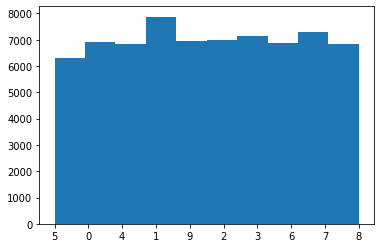

In [11]:
import matplotlib.pyplot as plt
plt.hist(target)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=1/7.0, random_state=0) 

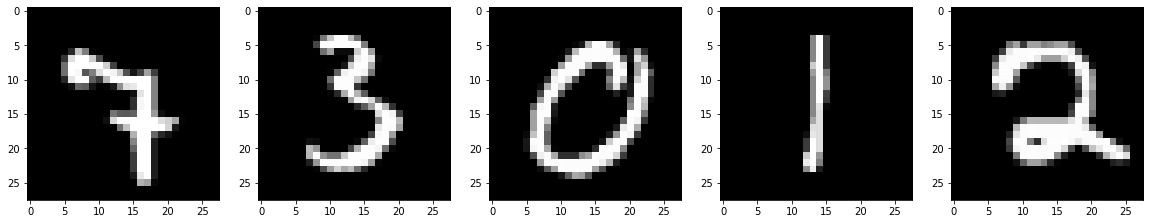

In [16]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

In [17]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()

**Fitting model without PCA**

In [31]:
%time logisticReg.fit(X_train, y_train)

CPU times: user 1min 11s, sys: 6.86 s, total: 1min 18s
Wall time: 40.3 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logisticReg.predict(X_test)

In [23]:
import sklearn.metrics as metric

In [30]:
score = metric.accuracy_score(y_test,y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.9184


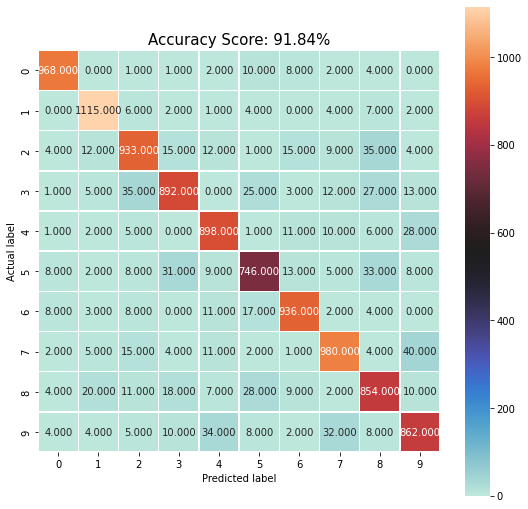

In [37]:
import seaborn as sns

confusion_matrix = metric.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'icefire');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(score*100)
plt.title(all_sample_title, size = 15);

**Fitting model using PCA**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
scaled_data = scaler.transform(data)

In [41]:
from sklearn.decomposition import PCA

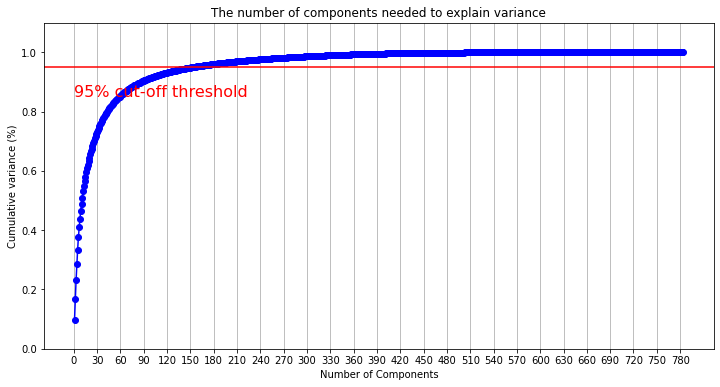

In [51]:
pca = PCA().fit(data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 784, step=30)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

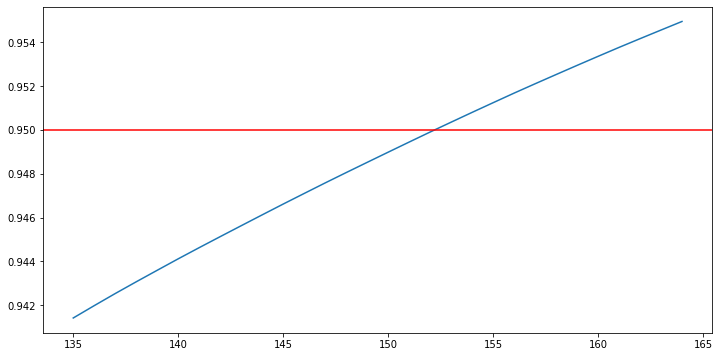

In [58]:
plt.plot(range(135,165),y[135:165])
plt.axhline(y=0.95, color='r', linestyle='-')


In [75]:
pca = PCA(n_components = 153)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=153, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
x_pca = pca.transform(scaled_data)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target, test_size=1/7.0, random_state=0) 

In [78]:
%time logisticReg.fit(X_train, y_train)

CPU times: user 16.8 s, sys: 5.85 s, total: 22.6 s
Wall time: 11.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
score = metric.accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.7837


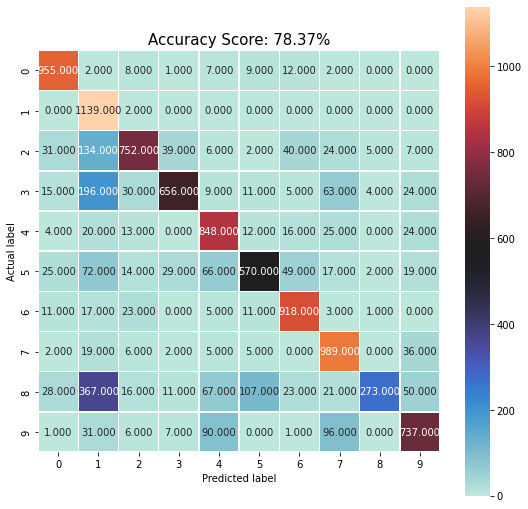

In [81]:
import seaborn as sns

confusion_matrix = metric.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'icefire');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(score*100)
plt.title(all_sample_title, size = 15);